In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("India_new_car_sales_by_make.csv") 

In [3]:
print ("Missing Values:\n", df.isnull().sum())

Missing Values:
 Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

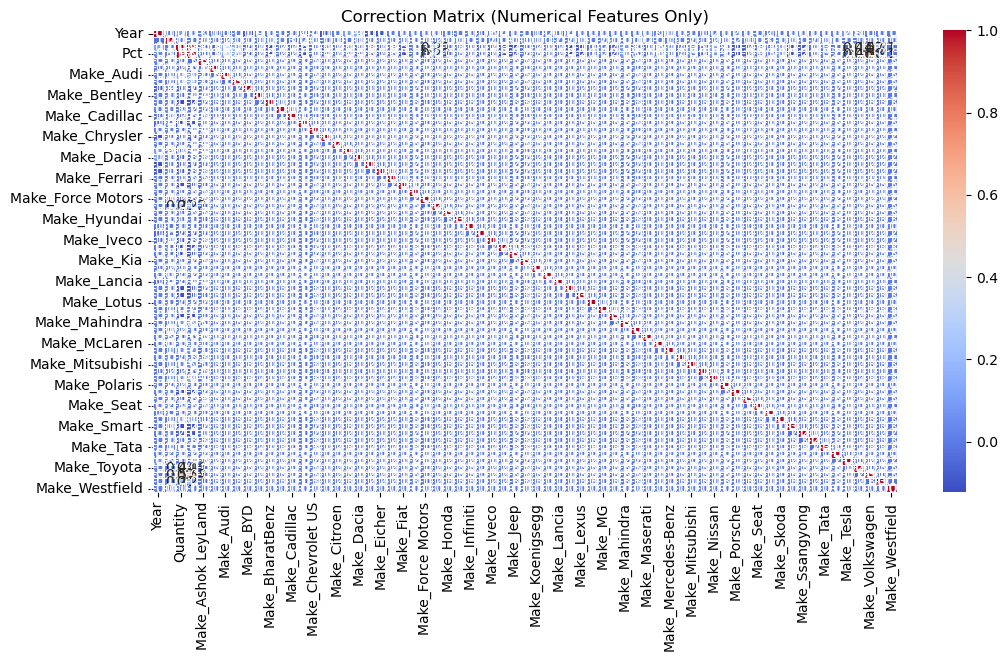

In [6]:
df_encoded = pd.get_dummies(df, columns= ["Make"], drop_first= False)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title('Correction Matrix (Numerical Features Only)')
plt.show()

In [7]:
df

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["Quantity", "Pct"])
y = df_encoded['Quantity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=40)

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1.89520000e+02, 4.91590000e+02, 1.62000000e+00, 4.18100000e+01,
       4.50000000e+02, 1.90600000e+01, 2.47000000e+00, 1.71530000e+02,
       5.74600000e+01, 2.32460000e+02, 7.35680000e+02, 9.57210000e+02,
       1.26165000e+03, 7.01030000e+02, 1.56500000e+01, 3.24730000e+02,
       3.17400000e+01, 1.37630000e+02, 5.75700000e+01, 2.85400000e+01,
       1.22900000e+01, 4.29700000e+01, 7.99000000e+00, 3.81390000e+02,
       9.94000000e+00, 2.22294000e+03, 5.97000000e+02, 5.95000000e+00,
       1.63000000e+00, 6.80000000e+00, 5.81190000e+02, 1.47259000e+03,
       1.28785000e+03, 9.32900000e+01, 2.27780000e+02, 6.10200000e+01,
       2.41980000e+02, 5.06170000e+02, 5.25350000e+02, 5.39090000e+02,
       1.28530000e+03, 2.58900000e+01, 1.32000000e+00, 6.13780000e+02,
       3.88270000e+02, 6.59500000e+02, 3.60450000e+02, 3.18600000e+01,
       1.14880000e+02, 1.62400000e+01, 2.77600000e+01, 2.35180000e+02,
       2.64510000e+02, 5.33000000e+00, 1.48366000e+03, 7.83600000e+01,
      

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state=40)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [15]:
print("\n🔹 Random Forest Regression Performance:")
print(f'MAE: {rf_mae: 2f}')
print(f'MSE: {rf_mse: 2f}')
print(f'R^2 Score: {rf_r2: 2f}')


🔹 Random Forest Regression Performance:
MAE:  56.691512
MSE:  11861.876558
R^2 Score:  0.933358


In [16]:
future_data = pd.DataFrame({
    "Year": [2026],
    "Month": [6],
    "Make_Toyota": [1],
    "Make_Volkswogen": [0],
    "Make_Mahindra": [0],
    "Make_Tata": [0],
})

In [17]:
future_data = future_data.reindex(columns= X.columns, fill_value=0)
future_data_scaled = scaler.transform(future_data)
future_pred = rf_model.predict(future_data_scaled)
print(f"\n🚗 Predicted Sales for Jan 2026 (Toyota): {future_pred[0]:.0f} units")


🚗 Predicted Sales for Jan 2026 (Toyota): 1502 units


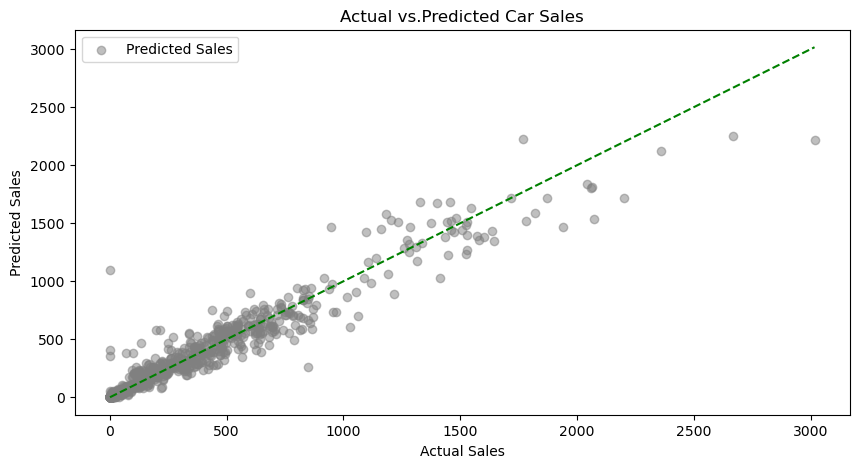

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color="gray", label= "Predicted Sales")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], linestyle="--", color = "green")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title('Actual vs.Predicted Car Sales')
plt.legend()
plt.show()

In [19]:
future_makes = ["Toyota", "Volkswagen", "Mahindra", "Tata", "Volvo"]

future_predictions = {}
total_future_sales = 0

for make in future_makes:
    future_data = pd.DataFrame({
        "Year": [2026],
        "Month": [6],
        **{f"Make_{m}": [1 if m == make else 0] for m in future_makes},
    })
    future_data = future_data.reindex(columns=X.columns, fill_value=0)

    future_data_scaled = scaler.transform(future_data)

    future_sales = rf_model.predict(future_data_scaled)[0]
    future_predictions[make] = future_sales
    total_future_sales += future_sales
    
print("\n🚗 Predicted Car Sales for June 2026:")
for make, sales in future_predictions.items():
    print(f"{make}: {sales:.0f} units")

print(f"\n📊 Total Predicted Sales (June 2026): {total_future_sales:.0f} units")


🚗 Predicted Car Sales for June 2026:
Toyota: 1502 units
Volkswagen: 2200 units
Mahindra: 376 units
Tata: 314 units
Volvo: 915 units

📊 Total Predicted Sales (June 2026): 5307 units


In [20]:
future_pct = {make: (sales / total_future_sales) * 100 for make, sales in future_predictions.items()}

print('\n📈 Predicted Market Share (%) for June 2026:')
for make, pct in future_pct.items():
    print(f"{make}: {pct:2f}%")


📈 Predicted Market Share (%) for June 2026:
Toyota: 28.297396%
Volkswagen: 41.457775%
Mahindra: 7.082923%
Tata: 5.914652%
Volvo: 17.247253%


C:\Users\mas12\AppData\Local\Temp\ipykernel_19708\2540923536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")
C:\Users\mas12\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


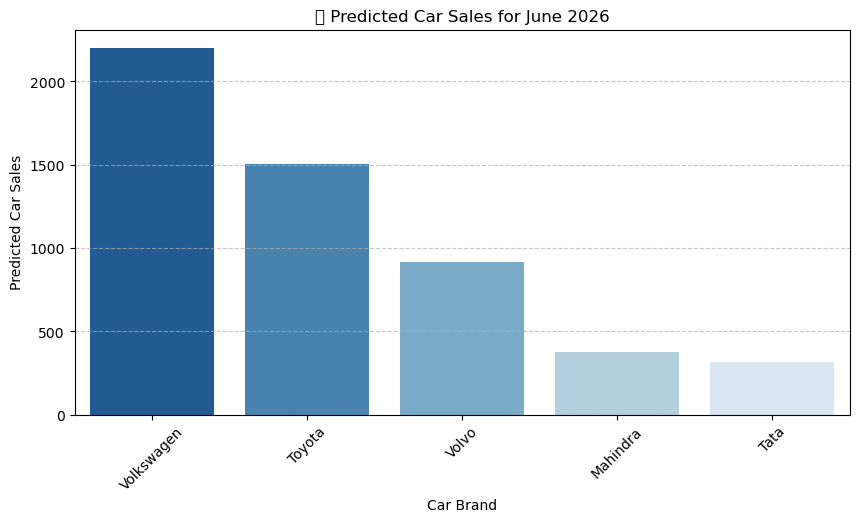

In [21]:
future_sales_df = pd.DataFrame(list(future_predictions.items()), columns=["Make", "Predicted_Sales"])

future_sales_df = future_sales_df.sort_values(by="Predicted_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")

plt.xlabel("Car Brand")
plt.ylabel("Predicted Car Sales")
plt.title("🚗 Predicted Car Sales for June 2026")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

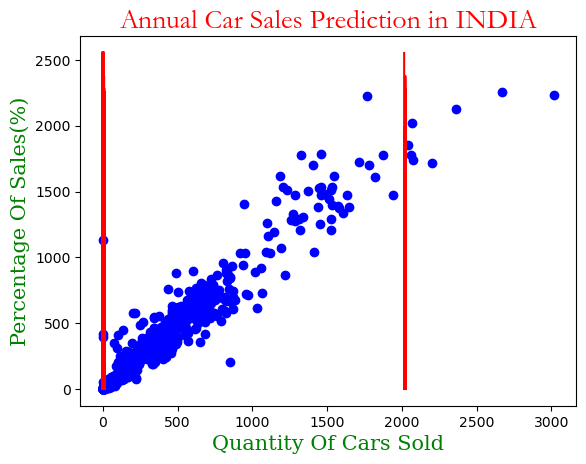

In [22]:
plt.scatter(y_test, y_pred, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color='red', label='Regression Line')
font1 = {'family': 'Garamond', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'green', 'size': 15}
plt.xlabel('Quantity Of Cars Sold', fontdict=font2)
plt.ylabel('Percentage Of Sales(%)', fontdict=font2)
plt.title('Annual Car Sales Prediction in INDIA', fontdict=font1)
plt.show()

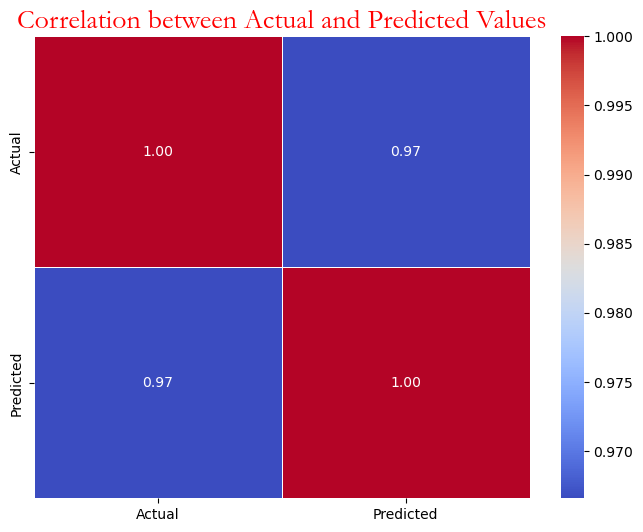

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths = 0.5)
font1 = {'family': 'Garamond', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'green', 'size': 15}
plt.title('Correlation between Actual and Predicted Values', fontdict=font1)
plt.show()